作業
在鐵達尼資料集中， 透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train .csv 中的 age 的遺失值進行補值。

step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, impute
from sklearn.metrics.pairwise import nan_euclidean_distances
import seaborn as sns

In [2]:
df = pd.read_csv("titanic/Titanic_train.csv")

缺失值比例：
Age       0.198653
Pclass    0.000000
Sex       0.000000
dtype: float64

    Age  Pclass     Sex
0  22.0       3    male
1  38.0       1  female
2  26.0       3  female
3  35.0       1  female
4  35.0       3    male
    Age  Pclass  Sex
0  22.0       3    1
1  38.0       1    0
2  26.0       3    0
3  35.0       1    0
4  35.0       3    1


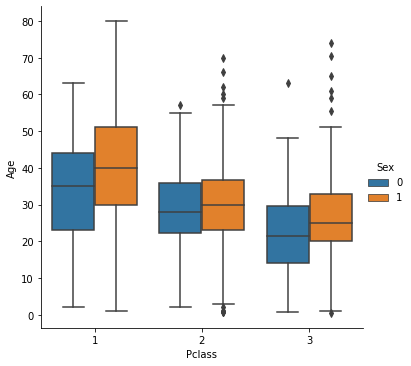

In [3]:
# 1.觀察 Age, Pclass 與 Sex 是否有關聯性？
df1 = df.loc[:,["Age", "Pclass", "Sex"]]

# 檢查缺失值的比例
missing_vals = df1.isnull().sum()/len(df1)
print("缺失值比例：")
print(missing_vals)
print()

# 下面兩行程式，讓 Male=1, Female=0
print(df1.head())
le = preprocessing.LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
print(df1.head())

sns.catplot(x="Pclass", y="Age", hue="Sex", data=df1, kind="box")

In [4]:
# 2 
# 從 1 可以看出 Pclass, Age 的確和 Sex 有關係
# 我們用 Sex, Pclass 來補 Age 的值

imputer = impute.KNNImputer(n_neighbors=3)
df1_filled = pd.DataFrame(imputer.fit_transform(df1), 
                          columns=["Age", "Pclass", "Sex"])

missing_index = df1.isnull()
print(df1[missing_index.values==True].head())
print(df1_filled[missing_index.values==True].head())

    Age  Pclass  Sex
5   NaN       3    1
17  NaN       2    1
19  NaN       3    0
26  NaN       3    1
28  NaN       3    0
          Age  Pclass  Sex
5   19.666667     3.0  1.0
17  45.000000     2.0  1.0
19  19.000000     3.0  0.0
26  19.666667     3.0  1.0
28  19.000000     3.0  0.0
